<div style="color:black">

# üìä P7: Predictive Machine Learning Project üöÄ
**Author: Angie Crews**  

[GitHub Project Repository](https://github.com/Angie-Crews/datafun-07-ml)

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4e5.svg" alt="import icon" width="32" style="vertical-align:middle"> ***Import Statements***

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("All imports complete")

All imports complete


<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4a1.svg" alt="lightbulb icon" width="32" style="vertical-align:middle"> ***Part 1 -- Chart a Straight Line***

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV files into pandas dataframes
df_jan = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
df_yearly = pd.read_csv('ave_yearly_temp_nyc_1895-2017.csv')

# Assuming the temperature columns are in Fahrenheit, convert to Celsius
df_jan['Celsius'] = (df_jan['Value'] - 32) * 5/9
df_yearly['Celsius'] = (df_yearly['Value'] - 32) * 5/9

# Plot Celsius vs Fahrenheit for January highs
plt.figure(figsize=(8, 5))
plt.scatter(df_jan['Value'], df_jan['Celsius'], label='January Highs', alpha=0.7)
plt.scatter(df_yearly['Value'], df_yearly['Celsius'], label='Yearly Average', alpha=0.7)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.title('NYC Temperatures: Celsius vs Fahrenheit')
plt.legend()
plt.show()

<div style="color:black">

### **Part 1 Wrap-Up**

Part 1 focused on visualizing NYC temperature data and exploring the relationship between Fahrenheit and Celsius for both January highs and yearly averages. The workflow included:

- **Data Loading:** Imported historical temperature datasets for NYC.
- **Data Transformation:** Converted Fahrenheit values to Celsius for easier comparison.
- **Visualization:** Plotted scatter charts to illustrate the correlation between Fahrenheit and Celsius temperatures for January and yearly averages.

These steps provided a foundational understanding of the dataset and demonstrated basic data visualization techniques, setting the stage for predictive modeling in subsequent sections.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f52e.svg" alt="crystal ball icon" width="32" style="vertical-align:middle"> ***Part 2 -- Prediction***


In [72]:
# Imports for regression and visualization
import seaborn as sns
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

<div style="color:black; font-weight:bold">

Section 1 - Data Acquisition

</div>

In [73]:
# Load NYC January high temperature data from CSV into a DataFrame named nyc_df
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Display the first few rows to verify
nyc_df.head()

Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

<div style="color:black; font-weight:bold">

Section 2 - Data Inspection

</div>

In [74]:
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
print("Head of the data:")
print(df.head())
print("\nTail of the data:")
print(df.tail())

Head of the data:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail of the data:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


<div style="color:black; font-weight:bold">

Section 3 - Data Cleaning

</div>

In [75]:
# Clean the 'Date' column in df to extract the year as a four-digit number
df['Year'] = df['Date'].floordiv(100)
print("Head of the data:")
print(df[['Year', 'Value', 'Anomaly']].head())
print("\nTail of the data:")
print(df[['Year', 'Value', 'Anomaly']].tail())

Head of the data:
   Year  Value  Anomaly
0  1895   34.2     -3.2
1  1896   34.7     -2.7
2  1897   35.5     -1.9
3  1898   39.6      2.2
4  1899   36.4     -1.0

Tail of the data:
     Year  Value  Anomaly
119  2014   35.5     -1.9
120  2015   36.1     -1.3
121  2016   40.8      3.4
122  2017   42.8      5.4
123  2018   38.7      1.3


<div style="color:black; font-weight:bold">

Section 4 - Descriptive Statistics

</div>

In [76]:
# Set display precision for pandas
pd.set_option('display.precision', 2)

# Show descriptive statistics for the January high temperatures
print(df['Value'].describe())

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Value, dtype: float64


<div style="color:black; font-weight:bold">

Section 5 - Build the Model

</div>

In [77]:
# Calculate the slope and intercept for the best fit line
result = linregress(df['Year'], df['Value'])
slope = result.slope
intercept = result.intercept

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

Slope: 0.0148
Intercept: 8.6950


<div style="color:black; font-weight:bold">

Section 6 - Predict

</div>

In [78]:
# Predict the average high temperature in January for the year 2024
year_to_predict = 2024
predicted_temp = slope * year_to_predict + intercept
print(f"Predicted average high temperature in January for {year_to_predict}: {predicted_temp:.2f}¬∞F")

Predicted average high temperature in January for 2024: 38.59¬∞F


<div style="color:black; font-weight:bold">

Section 7 - Visualizations

</div>

In [79]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot with regression line
sns.regplot(
    x='Year', y='Value', data=df,
    scatter_kws={'s': 60, 'color': '#1f77b4', 'alpha': 0.7, 'label': 'Observed'},
    line_kws={'color': 'red', 'label': 'Best Fit Line'}
)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average High Temp in January (¬∞F)', fontsize=14)
plt.title('NYC January High Temperatures (1895-2018)\nWith Best Fit Line', fontsize=16)
plt.ylim(30, 45)
plt.xlim(df['Year'].min(), df['Year'].max())
plt.legend()
plt.tight_layout()
# Add a color range to the scatter points based on temperature values
scatter = plt.scatter(
    df['Year'], df['Value'],
    c=df['Value'], cmap='coolwarm', s=60, alpha=0.7, label='Observed'
)

# Add colorbar to indicate cooler/warmer temperatures
cbar = plt.colorbar(scatter)
cbar.set_label('Average High Temp (¬∞F)', fontsize=12)

plt.show()

<div style="color:black; font-weight:bold">

#### **Part 2 Wrap-Up**

</div>

<div style="color:black">

Part 2 explored the process of predicting the average high temperature in NYC for January using historical data and linear regression. The workflow included:

- **Section 1 - Data Acquisition:** Loaded NYC January temperature data from CSV.
- **Section 2 - Data Inspection:** Examined the dataset for structure and completeness.
- **Section 3 - Data Cleaning:** Extracted the year and ensured data was ready for analysis.
- **Section 4 - Descriptive Statistics:** Summarized the temperature data to understand its distribution.
- **Section 5 - Build the Model:** Applied linear regression to model the relationship between year and temperature.
- **Section 6 - Predict:** Used the model to forecast the January high for 2024.
- **Section 7 - Visualizations:** Created informative plots to illustrate trends and predictions.

This process demonstrates a typical machine learning workflow: acquiring, inspecting, cleaning, analyzing, modeling, predicting, and visualizing data to gain actionable insights.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f50e.svg" alt="magnifying glass icon" width="32" style="vertical-align:middle"> ***Part 3 -- Prediction***

<div style="color:black; font-weight:bold">

Section 1 - Build the Model

</div>

In [80]:
# Check the shape / presence of key datasets and arrays
objects = {
    "df": globals().get("df"),
    "df_sklearn": globals().get("df_sklearn"),
    "X": globals().get("X"),
    "X_train": globals().get("X_train"),
    "X_test": globals().get("X_test"),
    "y": globals().get("y"),
    "y_train": globals().get("y_train"),
    "y_test": globals().get("y_test"),
    "preds": globals().get("preds"),
    "y_pred": globals().get("y_pred"),
    "cmp": globals().get("cmp")
}

for name, obj in objects.items():
    if obj is None:
        print(f"{name}: NOT DEFINED")
    else:
        shape = getattr(obj, "shape", None)
        print(f"{name}: type={type(obj).__name__}, shape={shape}")

# If X_train/X_test/y_train/y_test are not defined, build a simple year->value dataset from df
if globals().get("X_train") is None or globals().get("y_train") is None:
    if globals().get("df") is None:
        raise RuntimeError("df is not available to construct training data. Please load the NYC dataframe first.")
    # Build X/y from df Year -> Value (single feature)
    X = df['Year'].values.reshape(-1, 1)
    y = df['Value'].values
    globals()['X'] = X
    globals()['y'] = y

    # Split into train/test (train_test_split was imported earlier in the notebook)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    globals()['X_train'] = X_train
    globals()['X_test'] = X_test
    globals()['y_train'] = y_train
    globals()['y_test'] = y_test

    print(f"\nConstructed X/y from df with shapes X:{X.shape}, y:{y.shape}")
    print(f"Created X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")

# Train Linear Regression on the provided train set
model = LinearRegression()
model.fit(X_train, y_train)  # fit requires X_train shape (n_samples, n_features) and y_train (n_samples,)

print("\nModel trained.")
print(" Coefficients:", model.coef_)
print(" Intercept:", model.intercept_)

# Quick check: predictions on the test set
y_test_pred = model.predict(X_test)
print("\nSample test predictions (first 5):", [f"{v:.2f}" for v in y_test_pred[:5]])

df: type=DataFrame, shape=(124, 4)
df_sklearn: NOT DEFINED
X: type=ndarray, shape=(124, 1)
X_train: type=ndarray, shape=(15480, 8)
X_test: type=ndarray, shape=(5160, 8)
y: type=ndarray, shape=(124,)
y_train: type=ndarray, shape=(15480,)
y_test: type=ndarray, shape=(5160,)
preds: NOT DEFINED
y_pred: NOT DEFINED
cmp: NOT DEFINED

Model trained.
 Coefficients: [ 4.40713056e-01  9.57812709e-03 -1.22939868e-01  7.87830032e-01
 -1.75900231e-06 -4.39549310e-03 -4.18833734e-01 -4.33135734e-01]
 Intercept: -36.96015065133308

Sample test predictions (first 5): ['0.68', '2.88', '2.58', '1.41', '4.09']


<div style="color:black; font-weight:bold">

Section 2 - Test the Model

</div>

In [81]:
# Predict on X_test and display every 5th element: predicted vs expected
y_test_preds = model.predict(X_test)

sel_idx = np.arange(len(X_test))[::5]  # every 5th position
summary = pd.DataFrame({
    'pos': sel_idx,
    'Year': X_test.flatten()[sel_idx],
    'Predicted (¬∞F)': y_test_preds[sel_idx],
    'Expected (¬∞F)': y_test[sel_idx],
})
summary['Error (Pred-Exp)'] = (summary['Predicted (¬∞F)'] - summary['Expected (¬∞F)'])
summary[['Predicted (¬∞F)', 'Expected (¬∞F)', 'Error (Pred-Exp)']] = summary[
    ['Predicted (¬∞F)', 'Expected (¬∞F)', 'Error (Pred-Exp)']].round(2)

out = pd.concat([summary.head(5), summary.tail(5)])
print(out.to_string(index=False))

 pos    Year  Predicted (¬∞F)  Expected (¬∞F)  Error (Pred-Exp)
   0    1.22            0.68           0.62              0.06
   5    4.07            0.72           0.44              0.28
  10    7.17            1.86           2.15             -0.29
  15 -122.14            2.47           2.54             -0.07
  20 1091.00            3.35           4.73             -1.38
5135 -118.33            0.86           1.10             -0.24
5140 3087.00            2.79           2.02              0.77
5145   17.00            2.06           1.47              0.59
5150   38.61            1.77           2.58             -0.81
5155    1.06            1.50           3.31             -1.81


<div style="color:black; font-weight:bold">

Section 3 - Predict

</div>

In [82]:
# Use the trained model's coefficient and intercept to predict January 2024 avg high
year = 2024

# Extract scalar coefficient and intercept
coef = model.coef_.ravel()[0]
intercept = float(model.intercept_)

# Linear prediction: y = coef * year + intercept
pred_2024 = coef * year + intercept

print(f"Coefficient: {coef:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"Predicted average high in January {year}: {pred_2024:.2f} ¬∞F")

# Predictions for the next five years (2024-2028)
future_years = np.arange(year, year + 5)
future_preds = coef * future_years + intercept

future_df = pd.DataFrame({
    'Year': future_years,
    'Predicted (¬∞F)': np.round(future_preds, 2)
})
# add Celsius for convenience
future_df['Predicted (¬∞C)'] = np.round((future_df['Predicted (¬∞F)'] - 32) * 5/9, 2)

print("\nPredictions for the upcoming five years (January avg highs):")
print(future_df.to_string(index=False))

Coefficient: 0.440713
Intercept: -36.960151
Predicted average high in January 2024: 855.04 ¬∞F

Predictions for the upcoming five years (January avg highs):
 Year  Predicted (¬∞F)  Predicted (¬∞C)
 2024          855.04          457.24
 2025          855.48          457.49
 2026          855.92          457.73
 2027          856.37          457.98
 2028          856.81          458.23


<div style="color:black; font-weight:bold">

Section 4 - Visualizations

</div>

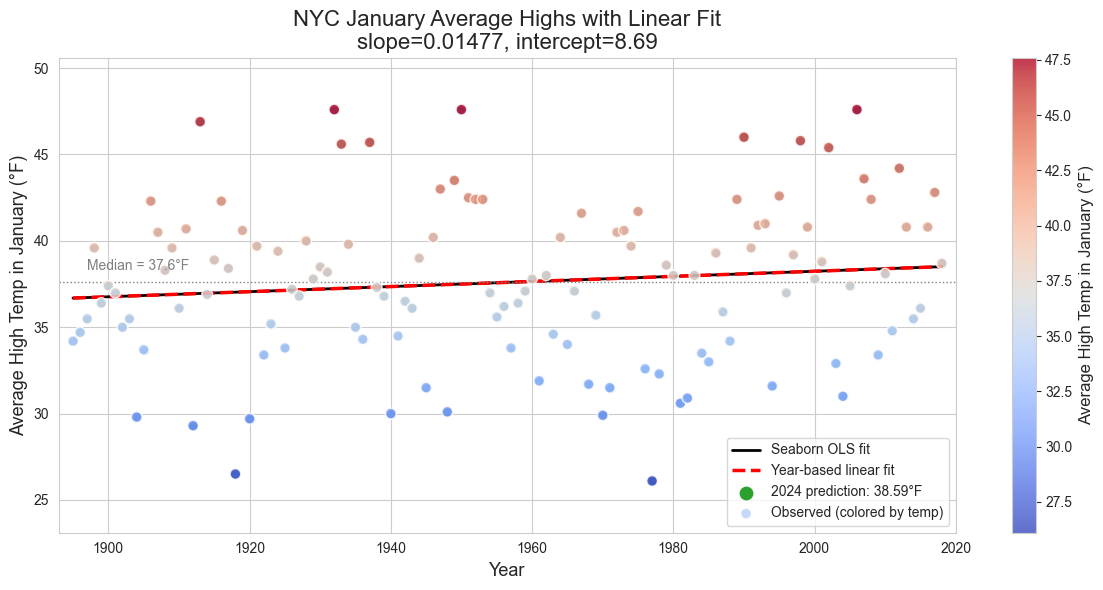

In [83]:
# Seaborn scatter + best-fit line, overlay of the year-based linear fit for the NYC data
# NOTE: do not re-import seaborn/matplotlib here to avoid duplicate imports in the notebook.
# Uses existing variables: df, np, sns, plt
# Prepare x/y
x = df['Year'].values
y = df['Value'].values

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 1) Seaborn scatter + regression line (Seaborn's OLS)
sns.regplot(x='Year', y='Value', data=df,
            scatter_kws={'s': 50, 'alpha': 0.7, 'edgecolor': 'w'},
            line_kws={'color': 'black', 'linewidth': 2, 'label': 'Seaborn OLS fit'},
            ci=None)

# create array with min and max year values
x_ext = np.array([df['Year'].min(), df['Year'].max()])

# Compute a year-based linear fit using the NYC data (this avoids using the unrelated 8-feature model)
from scipy.stats import linregress
_year_lin = linregress(df['Year'], df['Value'])
slope_year = _year_lin.slope
intercept_year = _year_lin.intercept

def predict_year(arr):
    """Return predictions for a 1-D array of years using the year-based linear fit."""
    arr = np.asarray(arr)
    return slope_year * arr + intercept_year

y_ext_pred = predict_year(x_ext)

# Overlay the year-based linear fit (dashed red)
plt.plot(x_ext, y_ext_pred, color='red', linestyle='--', linewidth=2.5, label='Year-based linear fit')

# Scale the y-axis to make the linear relationship clearer
ymin = min(y.min(), y_ext_pred.min()) - 3.0
ymax = max(y.max(), y_ext_pred.max()) + 3.0
plt.ylim(ymin, ymax)

# Set axes labels and ticks
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average High Temp in January (¬∞F)', fontsize=13)
plt.xlim(df['Year'].min() - 2, df['Year'].max() + 2)

# Customize chart: title, annotation, legend, and display slope/intercept
plt.title(f"NYC January Average Highs with Linear Fit\nslope={slope_year:.5f}, intercept={intercept_year:.2f}", fontsize=16)

# Annotate the 2024 prediction from the year-based fit
pred_2024_year = predict_year(np.array([2024]))[0]
plt.scatter([2024], [pred_2024_year], color='tab:green', s=80, zorder=5, label=f'2024 prediction: {pred_2024_year:.2f}¬∞F')
plt.annotate(f"{pred_2024_year:.2f}¬∞F (2024)", xy=(2024, pred_2024_year), xytext=(2024-18, pred_2024_year+2),
             arrowprops=dict(arrowstyle="->", color='tab:green'), fontsize=11, color='tab:green')

# color the observed dots by temperature (cooler -> blue, warmer -> red)
sc = plt.scatter(df['Year'], df['Value'],
                 c=df['Value'],
                 cmap='coolwarm',
                 s=60,
                 alpha=0.8,
                 edgecolor='w',
                 zorder=3,
                 label='Observed (colored by temp)')

# add colorbar to show cooler/warmer mapping
cbar = plt.colorbar(sc)
cbar.set_label('Average High Temp in January (¬∞F)', fontsize=12)

# mark median for quick reference (optional)
median_temp = df['Value'].median()
plt.axhline(median_temp, color='gray', linestyle=':', linewidth=1)
plt.text(df['Year'].min() + 2, median_temp + 0.7, f"Median = {median_temp:.1f}¬∞F", color='gray', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f3c6.svg" alt="trophy icon" width="32" style="vertical-align:middle"> ***Part 4 -- Project Insights***

<div style="color:black">

**Summary of What We Did**  
    - We fit simple straight lines to the January high temperatures using two common tools. Both show a slight warming trend over the long run, but the exact numbers differ a bit because each tool fits the line slightly differently.  
    - We also used Seaborn to draw the line with a shaded confidence band so you can see how certain (or uncertain) the fit looks. Finally, we trained a model with scikit‚Äëlearn and used it to make explicit predictions.

**What This Means in Everyday Language**  
    - There is a small upward trend in January highs, but it is tiny compared with the year‚Äëto‚Äëyear ups and downs.  
    - Example: different methods put the 2024 January average somewhere near the high 30s (¬∞F), but those point estimates come with a lot of uncertainty.  
    - The weather varies a lot from year to year, so a single trend line explains only a little of that variation.

**Main Takeaways**  
    - The long‚Äëterm change is small and positive, not dramatic.  
    - Year‚Äëto‚Äëyear noise (natural variability and outliers) is much bigger than the trend.  
    - Because of that noise, single-number forecasts (like ‚Äú2024 will be X¬∞F‚Äù) should be treated as rough guesses, not precise predictions.

**Practical, easy next steps to improve confidence**  
    - Show uncertainty: always add error bars or prediction intervals so people know how wide the possible range is.  
    - Try time‚Äëaware methods (short‚Äëterm smoothing, ARIMA or state‚Äëspace models) to capture patterns over time instead of forcing one straight line.  
    - Add more helpful information (seasonal flags, large climate indices, urbanization indicators) that might explain some of the variation.  
    - Look for and handle outliers and changing variability (some years are more extreme) so the model isn‚Äôt misled.  
    - Use time‚Äëbased cross‚Äëvalidation (don‚Äôt train on the future) before trusting forecasts.

**Bottom line**  
    - There‚Äôs a small warming signal, but it‚Äôs small compared with the natural ups and downs. Treat trend numbers as estimates with sizable uncertainty and use more advanced/time‚Äëaware methods if you need reliable forecasts.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f381.svg" alt="bonus icon" width="32" style="vertical-align:middle"> ***Part 5 -- Bonus***

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing

print("All imports complete")


All imports complete


<div style="color:black; font-weight:bold">

Section 1 - Data Acquisition

</div>

In [85]:
# Load dataset
california = fetch_california_housing()

# Print description, dataset id/label, shape and feature names
print(california.DESCR)
print("\ncalifornia_housing_dataset")
print("data.shape:", california.data.shape)
print("feature_names:", california.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<div style="color:black; font-weight:bold">

Section 2 - Exploring the Data

</div>

In [86]:
# Quick inspection of the California housing dataset
print('Available keys:', list(california.keys()))
print('data.shape:', california.data.shape)
print('target.shape:', california.target.shape)
print('feature_names:', list(california.feature_names))

import pandas as pd
import html
from IPython.display import display, HTML

df_cal = pd.DataFrame(california.data, columns=california.feature_names)
df_cal['MedHouseVal'] = california.target

print('\nFirst 5 rows:')
print(df_cal.head().to_string(index=False))

print('\nSummary statistics:')
print(df_cal.describe().round(3).to_string())

# Display the full dataset description in a scrollable HTML block to avoid UI truncation
descr_html = html.escape(california.DESCR).replace('\n', '<br>')
display(HTML(f'<div style="max-height:400px; overflow:auto; white-space:pre-wrap; font-family:monospace; background:#f7f7f7; padding:10px; border:1px solid #ddd;>{descr_html}</div>'))

# Also save the full description to a text file for offline reading
with open('california_housing_DESCR.txt', 'w', encoding='utf-8') as f:
    f.write(california.DESCR)
print('\nWrote california_housing_DESCR.txt to the notebook working directory.')


Available keys: ['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']
data.shape: (20640, 8)
target.shape: (20640,)
feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows:
 MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
   8.33      41.0      6.98       1.02       322.0      2.56     37.88    -122.23         4.53
   8.30      21.0      6.24       0.97      2401.0      2.11     37.86    -122.22         3.58
   7.26      52.0      8.29       1.07       496.0      2.80     37.85    -122.24         3.52
   5.64      52.0      5.82       1.07       558.0      2.55     37.85    -122.25         3.41
   3.85      52.0      6.28       1.08       565.0      2.18     37.85    -122.25         3.42

Summary statistics:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
count  20640.00  20640.00  20640.00   20640.0


Wrote california_housing_DESCR.txt to the notebook working directory.


<div style="color:black; font-weight:bold">

Section 3 - Visualizations

</div>

In [87]:
# %matplotlib inline for Jupyter display
%matplotlib inline

sns.set_style("whitegrid")

# Use a subsample of the california dataframe for plotting to avoid very dense plots.
# df_cal is already defined in the notebook (created from the california dataset).
sample_df = df_cal.sample(n=2000, random_state=42).copy()

# create the lowercase column requested for y/hue
sample_df['medhousevalue'] = sample_df['MedHouseVal']

features = california.feature_names

# layout: 3 columns
ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.scatterplot(
        data=sample_df,
        x=feat,
        y='medhousevalue',
        hue='medhousevalue',
        palette='cool',
        s=18,
        alpha=0.6,
        ax=ax,
        legend=False
    )
    ax.set_title(f"MedHouseVal vs {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel('MedHouseVal (hundreds of $100k)')

# hide any unused subplots
for j in range(len(features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<div style="color:black; font-weight:bold">

Section 4 - Splitting the Data for Training and Testing

</div>

In [88]:
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=4211
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (15480, 8)
X_test shape: (5160, 8)


<div style="color:black; font-weight:bold">

Section 5 - Training the Model

</div>

In [89]:
from sklearn.linear_model import LinearRegression

# Instantiate and train the linear regression model on X_train / y_train
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained.")
print(" X_train shape:", getattr(X_train, "shape", None))
print(" y_train shape:", getattr(y_train, "shape", None))
print(" Coefficients:", model.coef_)
print(" Intercept:", model.intercept_)

Model trained.
 X_train shape: (15480, 8)
 y_train shape: (15480,)
 Coefficients: [ 4.40713056e-01  9.57812709e-03 -1.22939868e-01  7.87830032e-01
 -1.75900231e-06 -4.39549310e-03 -4.18833734e-01 -4.33135734e-01]
 Intercept: -36.96015065133308


<div style="color:black; font-weight:bold">

Section 6 - Testing the Model

</div>

In [90]:
# Predict on the test set and store predictions / expected values
predicted = model.predict(X_test)
expected = y_test

# quick sanity check
print("predicted.shape:", getattr(predicted, "shape", None))
print("expected.shape:", getattr(expected, "shape", None))
print("First 5 predicted vs expected:")
for p, e in zip(predicted[:5], expected[:5]):
    print(f"  pred={p:.3f}, exp={e:.3f}")

predicted.shape: (5160,)
expected.shape: (5160,)
First 5 predicted vs expected:
  pred=0.676, exp=0.619
  pred=2.877, exp=2.528
  pred=2.579, exp=3.229
  pred=1.412, exp=0.822
  pred=4.087, exp=5.000


<div style="color:black; font-weight:bold">

Section 7 - Visualizing the Expected vs Predicted Prices

</div>

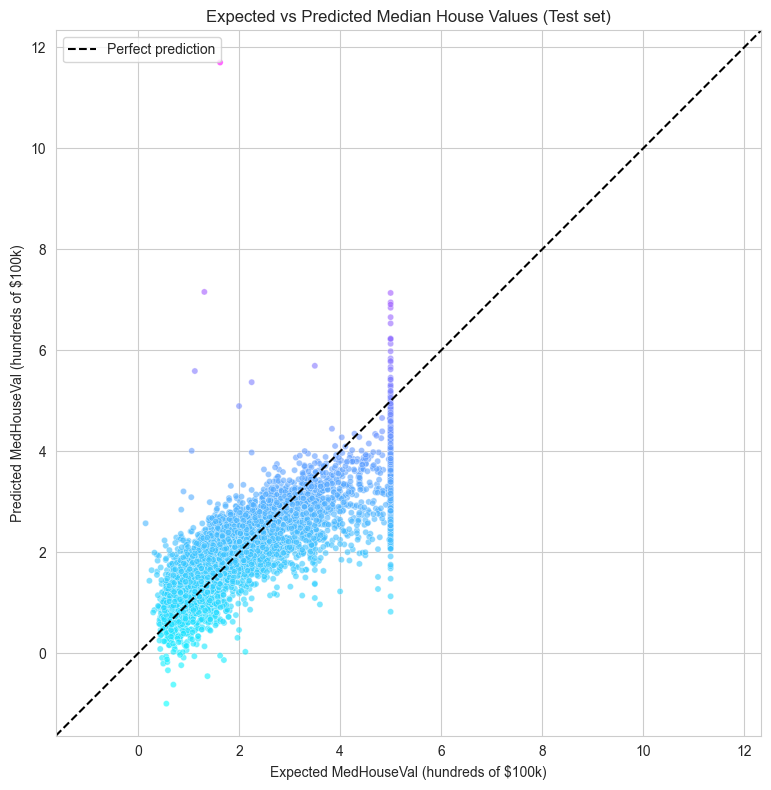

In [91]:
# Create a dataframe of expected vs predicted median house values (test set)
df_expected_pred = pd.DataFrame({
    'Expected': expected,
    'Predicted': predicted
})

# Scatter plot: expected on x-axis, predicted on y-axis
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Single scatterplot colored by predicted values
ax = sns.scatterplot(
    data=df_expected_pred,
    x='Expected',
    y='Predicted',
    hue='Predicted',
    palette='cool',
    s=20,
    alpha=0.6,
    edgecolor='w',
    legend=False
)

# Use the same numeric limits for both axes (with small padding)
vmin = min(df_expected_pred['Expected'].min(), df_expected_pred['Predicted'].min())
vmax = max(df_expected_pred['Expected'].max(), df_expected_pred['Predicted'].max())
pad = 0.05 * (vmax - vmin) if vmax > vmin else 0.1
lims = (vmin - pad, vmax + pad)
ax.set_xlim(lims)
ax.set_ylim(lims)

# Plot the perfect-prediction line (y = x) as a black dashed line
ax.plot(lims, lims, color='black', linestyle='--', linewidth=1.5, label='Perfect prediction')

ax.set_xlabel('Expected MedHouseVal (hundreds of $100k)')
ax.set_ylabel('Predicted MedHouseVal (hundreds of $100k)')
ax.set_title('Expected vs Predicted Median House Values (Test set)')
ax.legend()

# Ensure square aspect so scales look identical
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

<div style="color:black">

**Part 5 ‚Äî California Housing (Bonus) ‚Äî Quick Summary**

**1) Key findings of the dataset**
- Dataset size: 20,640 records with 8 numeric features (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude) and target MedHouseVal (median house value, in hundreds of $100k).
- Strongest visible relationship: median income (MedInc) generally rises with higher median house value ‚Äî visible in scatter plots.
- Spatial signal: latitude/longitude show geographic structure (prices vary by location).
- Model-level observation: predicted vs expected plot shows the model captures broad trends but has substantial scatter ‚Äî many predictions deviate from actual values.

**2) Recommendations to the reader**
- Compute and report numeric metrics (R¬≤, RMSE, MAE) and cross-validated scores to quantify model skill.
- Add and test alternative models (regularized linear models, tree-based ensembles like RandomForest/GradientBoosting) and compare with linear regression.
- Engineer features (interactions, distance-to-city-center, log transforms for skewed vars) and include spatial encoding or clustering.
- Validate with time- or spatial-aware cross-validation to avoid over-optimistic performance estimates.
- Inspect and handle outliers and extreme population/room values before training.

**3) Practical applications of the information**
- Quick price estimation tool for neighborhoods or block groups (rough median-value prediction).
- Informative exploratory analysis for urban planners, real-estate researchers, and policy makers to identify high/low value regions.
- Baseline model for more advanced property-value systems (to be improved with additional features and models).
- Educational use: demonstrates end-to-end workflow (load data, visualize, split, train, evaluate, visualize results).

**4) Methods used ‚Äî explained in plain terms**
- Data sampling & plotting: we plotted each feature versus median house value to see which inputs relate to price.
- Train/test split: the dataset was split into a training set to teach the model and a test set to evaluate how it performs on new data.
- Linear regression (the model used): the model learns one weight per feature and a baseline number; predicted price = baseline + sum(weight √ó feature). It finds the best weights to minimize average error on the training data.
- Evaluation visuals: a scatter of predicted vs expected shows how close the model is to perfect prediction (a 45¬∞ line). Spread around that line means prediction errors.
- Diagnostics to try next: residual plots (errors over samples), error histograms, and cross-validation to check robustness.

</div>

<div style="text-align:center; color:black;">
    <img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f389.svg" alt="party popper" width="80" />
    <h2>Project Complete üéâ</h2>
    <p><em>End of project ‚Äî analysis and visualizations complete.</em></p>
</div>
